
###### by Anderson Felipe [Linkedin](https://www.linkedin.com/in/andersonftdj/)/[Github](https://github.com/andersonftdj)
---
# Analisando os dados do Airbnb - New York

O [Airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa de hotelaria da atualidade** mesmo sem ser proprietário de um único hotel. A empresa disponibiliza uma plataforma inovadora que busca conectar viajantes em busca de uma estadia com anfitriões que tem uma casa, apartamento ou quarto disponível para alugar.


Fundada em 2008, atingiu o status de **empresa unicórnio** (empresas com o valor de mercado acima de 1 Bilhão de dólares) em 2012. Hoje conta com mais de 4 milhões de usários oferecendo hospedagem, sendo a maioria fora dos Estados Unidos.

Uma das iniciativas da empresa é disponibilizar dados das principais cidades do mundo através do [Portal Insider](http://insideairbnb.com/get-the-data.html). É possível realizar o download de uma grande quantidade de dados e analisar para desenvolver projetos de data science.

<center><img alt = "Analisando dados Airbnb" width = "25%" src = "https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg" > </center>

**Neste *notebook* iremos analisar os dados referente a cidade de Nova York e ver quais insights podem ser extraidos desses dados brutos.**



<img src = 'https://image.freepik.com/vetores-gratis/conjunto-de-icones-de-ferramentas-de-reparo-domestico_1284-37668.jpg' width = 35%>


# Importação das bibliotecas

Usaremos as seguintes bibliotecas para a análise:
* pandas
* matplotlib
* seaborn

In [1]:
# importação dos pacotes 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# configurando gráficos 
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False 

## Obtenção dos dados

Para essa Análise Exploratória inicial será usado o seguinte arquivo:
* [`listings.csv`](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-12-10/visualisations/listings.csv) - Summary information and metrics for listings in New York City (good for visualisations).

In [2]:
# importando os dados para um dataframe 
df =  pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2020-12-10/visualisations/listings.csv')

<img src = 'https://image.freepik.com/vetores-gratis/ilustracao-do-conceito-de-analise_114360-1119.jpg' width = 30%>

## Análise de Dados 
Esta fase tem como objetivo compreender como os dados estão estruturados.
Isso será feito respondendo algumas perguntas.

Para facilitar o entendimento, este é o dicionário de variáveis:

**Dicionário de variáveis**
* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada.
* `host_id` - Número de id do proprietário (anfitrião) do imóvel
* `host_name` - Nome do anfitrião do imóvel
* `neighbourhood_group` - Nome dos distrítos da cidade (Manhattan, Brooklyn, Queens, Bronx, Staten Island)
* `neighbourhood` - Nome do bairro onde o imóvel está localizado
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Tipos de locação disponível
* `price` - Preço para locação
* `minimum_nights` - Quantidade mínima de noites para poder alugar
* `number_of_reviews` - Número de reviews feitas
* `last_review` - Data da último avaliação
* `reviews_per_month` - Quantidade de avaliações por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias disponíveis dentro dos 365 disponíveis.

Antes de iniciar a análise vamos verificar a cara do dataset pelas primeiras entradas

In [3]:
# Mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
print( " O dataset possui: \n {} variáveis".format( df.shape[1] ) )
print( " {} entradas ".format( df.shape[0] ) )

df.dtypes

 O dataset possui: 
 16 variáveis
 36923 entradas 


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
(df.isnull().sum() / df.shape[0] * 100).sort_values( ascending =  False)

reviews_per_month                 25.415053
last_review                       25.415053
name                               0.035208
host_name                          0.024375
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

Podemos perceber que: 
* Certca de 25% dos `reviews_per_month` e `last_review` estão ausentes
* Menos de 1% de `name` e `host_name`estão faltando

### **Q3. Qual o tipo de distribuição das variáveis?** 

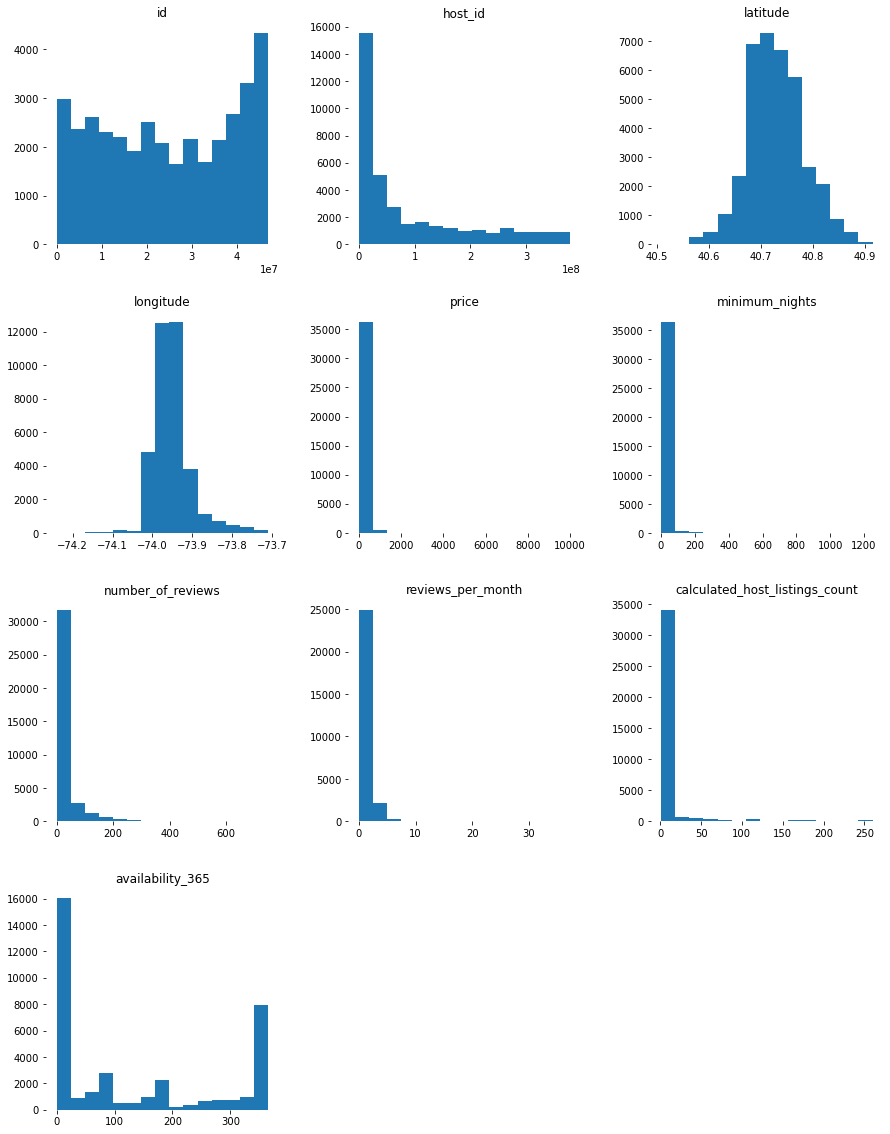

In [6]:
df.hist(bins = 15, figsize = ( 15, 20 ), grid=False);
#ax1.axis("off")


As variáveis `price` e `minimum_nights` estão com a visualização distorcida indicando que há possíveis outliers, ou seja, valores que estão fora do padrão de distribuição do conjunto de dados. 

Vamos investigar um pouco melhor a presença desses outliers através de um boxplot.

### Outliers

#### Boxplot

O boxplot é uma forma padronizada para exibir a distribuição dos dados com base em 5 estatísticas:
*mínimo* ou *limite inferior*, *primeiro quartil*, *mediana*, *terceiro quartil* e *máximo* ou *limite superior*.



Do limite inferior ao limite superior temos toda a distribuição dos dados com exceção dos outliers.

O primeiro quartil compreende 25% dos dados, a mediana compreende 50% e o tereceiro quartil compreende 75% dos dados. 



<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png' width = 50%>


Para calcular os limites do boxplot e remover os outliers usamos o IQR score ou intervalo interquartil da seguinte maneira:

* 1 - Identificar o valor do primeiro quartil (Q1) e do terceiro quartil (Q3)
* 2 - Subtrair Q3 de Q1 para obter o IQR
* 3 - Definir o limite superior e o inferior através das fórmulas:
    * Superior:  Q3 + 1.5 * IQR
    * Inferior : Q1 - 1.5 * IQR
* 4 - Remover valores fora desse range, pois estes serão os outliers



<img src = 'https://miro.medium.com/max/875/1*0MPDTLn8KoLApoFvI0P2vQ.png' width = 50%>

### Identificando e Removendo Outliers


#### Price

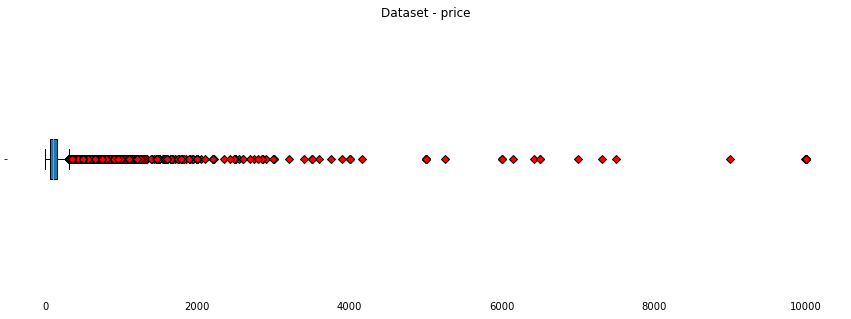

In [7]:
# Gráfico Antes
fig = plt.figure( figsize = (15,5) )
specs = gridspec.GridSpec(ncols = 1, nrows=1, figure = fig )
ax1 = fig.add_subplot(specs[0,0])
ax1.set_title( 'Dataset - price')
ax1.tick_params(bottom=False)
green_diamond = dict(markerfacecolor='r', marker='D')
ax1.boxplot(df.price, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond);



In [8]:
# Identificando os outliers
# Definindo IQR
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price

# Definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print( "Q1: {}".format(q1_price))
print( "Q3: {} ".format(q3_price))
print( "IQR: {} \n".format(IQR_price))

print( "O limite superior é: {}".format(sup_price) )
print( "O limite inferior é: {}\n".format(inf_price) )

# compreendendo o efeito da remoção
print( 'O dataset contém {} linhas'.format( df.shape[0] ) )
print( 'Serão removidas {} linhas '.format( df.loc[ ( df.price > sup_price ) | ( df.price < inf_price ) ].shape[0] ))
print( 'Isso corresponde a {:.2f}% dos dados'.format(
    (df.loc[ ( df.price > sup_price ) | ( df.price < inf_price )].shape[0]) / ( df.shape[0] ) * 100 ) )

#Criando cópia do df original para comparação
df_original = df.copy()

Q1: 61.0
Q3: 159.0 
IQR: 98.0 

O limite superior é: 306.0
O limite inferior é: -86.0

O dataset contém 36923 linhas
Serão removidas 2300 linhas 
Isso corresponde a 6.23% dos dados


Uma vez identificado que, de fato, há outliers podemos dar início ao tratamento. Faremos da maneira mais simples possível: **Removendo-os.**

Removeremos também as linhas em que o valor cobrado por aluguel é igual a zero, pois uma vez que estamos falando em alugar uma casa e pagar as taxas envolvidas para o Airbnb, não faz sentido não cobrar.

Os outliers encontrados correspondem a 6.23% dos dados. Embora seja um número considerável, por hora, não falará falta eliminar essas linhas.



In [9]:
# Removendo 
df.drop( df[ ( df.price > sup_price ) | ( df.price < inf_price ) | (df.price == 0)].index, axis=0, inplace=True)


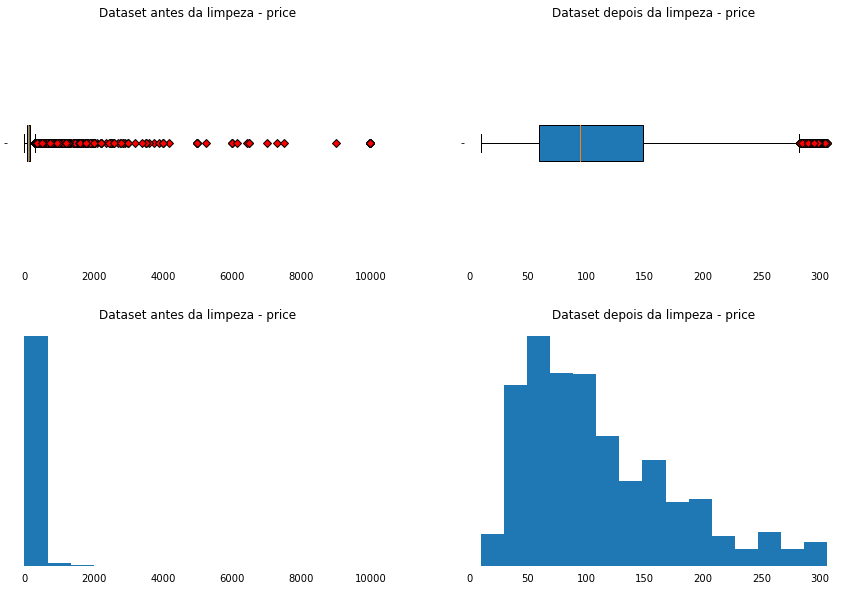

In [10]:
# Gráfico Depois
fig =  plt.figure( figsize = (15,10) )
specs = gridspec.GridSpec(ncols = 2, nrows=2, figure = fig )
specs.update(wspace=0.2, hspace=0.25)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[0,1])
ax4 = fig.add_subplot(specs[1,1])

green_diamond = dict(markerfacecolor='r', marker='D')

ax1.boxplot(df_original.price, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond)
ax1.set_title('Dataset antes da limpeza - price')
ax1.tick_params(bottom=False)


ax2.hist(df_original.price, bins=15 )
ax2.set_title('Dataset antes da limpeza - price')
ax2.tick_params(bottom=False)
ax2.tick_params(left=False)
ax2.tick_params(labelleft=False)


ax3.boxplot(df.price, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond)
ax3.set_title('Dataset depois da limpeza - price')
ax3.tick_params(bottom=False)



ax4.hist(df.price, bins=15 )
ax4.set_title('Dataset depois da limpeza - price')
ax4.tick_params(bottom=False)
ax4.tick_params(left=False)
ax4.tick_params(labelleft=False)



Da mesma forma faremos para a variável `minimum_nights`

#### minimum_nights

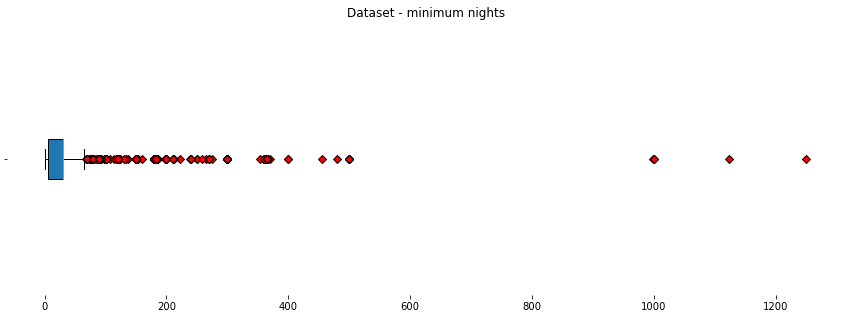

In [11]:
# Gráfico Antes
fig =  plt.figure( figsize = (15,5) )
specs = gridspec.GridSpec(ncols = 1, nrows=1, figure = fig )

green_diamond = dict(markerfacecolor='r', marker='D')

ax1 = fig.add_subplot(specs[0,0])

ax1.set_title( 'Dataset - minimum nights')
ax1.boxplot(df.minimum_nights, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond);


In [12]:
Q1_minimum_night = df.minimum_nights.quantile(.25)
Q3_minimum_night = df.minimum_nights.quantile(.75)
IQR_minimum_nights = Q3_minimum_night - Q1_minimum_night

print( "Q1: {}".format(Q1_minimum_night))
print( "Q3: {} ".format(Q3_minimum_night))
print( "IQR: {} \n".format(IQR_minimum_nights))


#
sup_minimum_nights = Q3_minimum_night + 1.5 * IQR_minimum_nights
inf_minimum_nights = Q1_minimum_night - 1.5 * IQR_minimum_nights

print( "O limite superior é: {}".format(sup_minimum_nights) )
print( "O limite inferior é: {}\n".format(inf_minimum_nights) )


print( 'O dataset tem {} linhas'.format( df.shape[0]))
print( 'Serão removidas {} linhas '.format( df.loc[ (df['minimum_nights'] > sup_minimum_nights) |
                                                   (df['minimum_nights'] < inf_minimum_nights) ].shape[0] ))
print('Isso corresponde a {:.2f}% dos dados'.format(((df.loc[ (df['minimum_nights'] > sup_minimum_nights) | (df['minimum_nights'] < inf_minimum_nights) ].shape[0] ) / (df.shape[0])  * 100)))

Q1: 5.0
Q3: 30.0 
IQR: 25.0 

O limite superior é: 67.5
O limite inferior é: -32.5

O dataset tem 34600 linhas
Serão removidas 432 linhas 
Isso corresponde a 1.25% dos dados


In [13]:
# Removendo

df.drop(df.loc[ (df['minimum_nights'] > sup_minimum_nights) | (df['minimum_nights'] < inf_minimum_nights) ].index, axis=0, inplace=True)

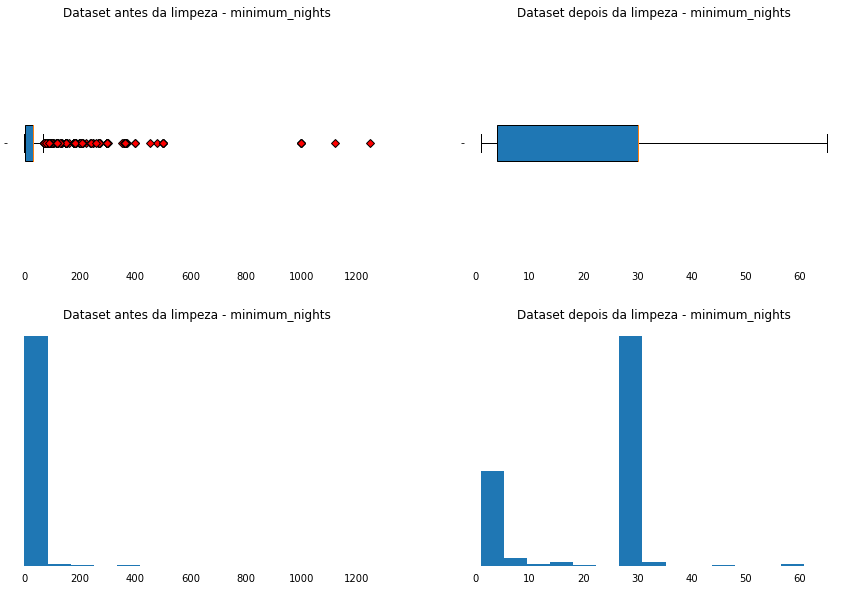

In [14]:
# Gráfico Depois
fig =  plt.figure( figsize = (15,10) )
specs = gridspec.GridSpec(ncols = 2, nrows=2, figure = fig )
specs.update(wspace=0.2, hspace=0.25)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[0,1])
ax4 = fig.add_subplot(specs[1,1])

green_diamond = dict(markerfacecolor='r', marker='D')


fig.patch.set_visible(False)

ax1.boxplot(df_original.minimum_nights, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond);
ax1.set_title('Dataset antes da limpeza - minimum_nights')
ax1.tick_params(bottom=False)


ax2.hist(df_original.minimum_nights, bins=15 )
ax2.set_title('Dataset antes da limpeza - minimum_nights')
ax2.tick_params(bottom=False)
ax2.tick_params(left=False)
ax2.tick_params(labelleft=False)


ax3.boxplot(df.minimum_nights, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond);
ax3.set_title('Dataset depois da limpeza - minimum_nights')
ax3.tick_params(bottom=False)


ax4.hist(df.minimum_nights, bins=15 );
ax4.set_title('Dataset depois da limpeza - minimum_nights')
ax4.tick_params(bottom=False)
ax4.tick_params(left=False)
ax4.tick_params(labelleft=False)

# import matplotlib as mpl

# mpl.rcParams['axes.spines.left'] = False
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.bottom'] = False 



### **Q4. Qual a média dos preços de aluguel?**

In [15]:
 print( 'Valor médio do aluguel: ${:.2f}'.format( df.price.mean() ))

Valor médio do aluguel: $109.71


### **Q4. Qual a correlação existente entre as variáveis**


In [16]:
# Matriz de correlação entre as variáveis.
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
           'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.029859,-0.022868,-0.057185,0.002254,0.018001
minimum_nights,0.029859,1.000000,-0.244582,-0.378606,0.115782,-0.137321
number_of_reviews,-0.022868,-0.244582,1.000000,0.707527,-0.102024,0.157710
reviews_per_month,-0.057185,-0.378606,0.707527,1.000000,-0.061566,0.204512
calculated_host_listings_count,0.002254,0.115782,-0.102024,-0.061566,1.000000,0.196310
availability_365,0.018001,-0.137321,0.157710,0.204512,0.196310,1.000000


Para facilitar a visualização da correlação usaremos um heatmap

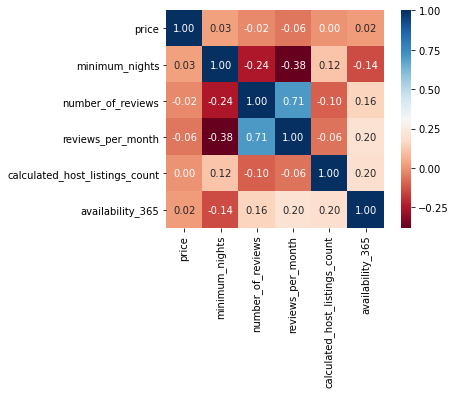

In [17]:
sns.heatmap( corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

As variáveis com maior correlação são `number_of_reviews` e `reviews_per_month`, o que faz sentido já que ambas são a respeito das avaliações totais e por mês.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**


In [18]:
df.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    50.550222
Private room       47.052798
Shared room         1.861391
Hotel room          0.535589
Name: room_type, dtype: float64

A maioria dos imóveis disponíveis são casa/apartamentos ou quartos privados

### **Q6. Qual a localidade mais cara do dataset?**


In [19]:
print(df.groupby(['neighbourhood']).price.mean().sort_values( ascending = False).head(6))

neighbourhood
Woodrow            255.000000
Lighthouse Hill    200.000000
Belle Harbor       196.333333
Huguenot           180.000000
Tribeca            178.956140
DUMBO              172.607143
Name: price, dtype: float64


In [20]:
# Localidade, Preço e Quantidade de amostra.
for i in range (6):
    print( 'Localidade: {}'.format( df.groupby(['neighbourhood']).price.mean().sort_values(ascending = False).index[i] ),
         '\nPreço: ${:.2f}'.format(df.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[i]))
        
    neighbourhood = df.groupby(['neighbourhood']).price.mean().sort_values(ascending = False).index[i]
    
    print( 'Quantidade de amostras: {}\n'.format( df.loc[ df.neighbourhood == neighbourhood].shape[0] ))
    

Localidade: Woodrow 
Preço: $255.00
Quantidade de amostras: 1

Localidade: Lighthouse Hill 
Preço: $200.00
Quantidade de amostras: 1

Localidade: Belle Harbor 
Preço: $196.33
Quantidade de amostras: 3

Localidade: Huguenot 
Preço: $180.00
Quantidade de amostras: 1

Localidade: Tribeca 
Preço: $178.96
Quantidade de amostras: 114

Localidade: DUMBO 
Preço: $172.61
Quantidade de amostras: 28



Um ponto de atenção é a quantidade de amostras, pois nas quatro primeiras ocorrências de 'localidade mais cara' podemos notar que há poucas casas nesses bairros o que pode induzir a erros de análise.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**


In [21]:
print('A média do mínimo de noites são de {:.0f} dias'.format( df.minimum_nights.mean() ))


A média do mínimo de noites são de 22 dias


## Q8. Plotando um mapa

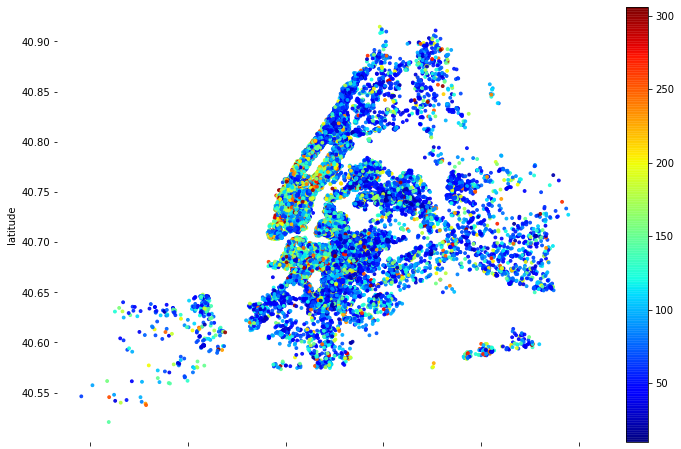

In [22]:
import numpy as np
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.9, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Tal qual o boxplot, aqui também podemos ver de uma maneira mais intuitva que a grande maioria dos preços ( 75% ) estão em até $150.

## Conclusão

Foi feita uma breve análise na base de dados da Airbnb, porém, foi possível encontrar e tratar outliers existentes em alguns atributos. Para uma Análise Exploratória de Dados (**EDA**), pudemos ver o quanto faz diferença na **visualização** fazer a limpeza dos outliers.

Notou-se também que em alguns bairros as amostras não são significativas para podermos analisar de fato os dados, podendo atrapalhar ou distorcer as informações estatísticas.

Por fim é bom salientar que esses dados são uma versão resumida, não sendo a ideal para uma analise mais aprofundada. Recomenda-se a versão completa que também é disponibilizada no [Portal Insider](http://insideairbnb.com/get-the-data.html) com mais variáveis disponíveis. 